<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://media-exp2.licdn.com/dms/image/C4D22AQFi0OVtzMJ3OA/feedshare-shrink_800/0/1657887716623?e=1660780800&v=beta&t=d-O1tmLGC0phHv3oREvvz6I9akSJMJXhzU8ZyCZJZo0" width="200" alt="MT Learners"  />
    </a>
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Normalization

Normalization is technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the range of values or losing information

In [2]:
#We will use only three columns of our data set and label them
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2]) 
df.columns=['Class label','Alcohol','Malic acid']

In [3]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

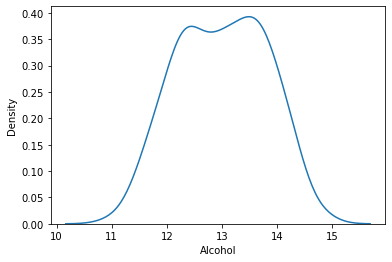

In [4]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

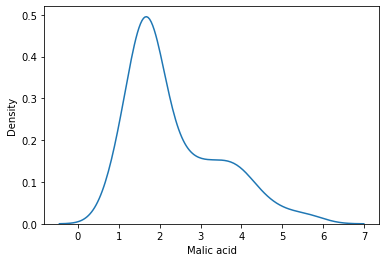

In [5]:
sns.kdeplot(df['Malic acid'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

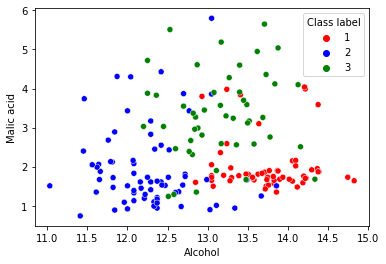

In [6]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

# Train Test split

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class label',axis='columns'),df['Class label'],test_size=0.3,random_state=0)

In [8]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

# MinMax_Scalling 

Also known as min-max scaling or min-max normalization, rescaling is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.

<p style="text-align:center">
    <a href="https://androidkt.com/how-to-scale-data-to-range-using-minmax-normalization/" target="_blank">
    <img src="minmax_scaling.png" width="200" alt="MinMax_Scaling"  />
    </a>
</p>

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_trained_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [10]:
x_trained_scaler=pd.DataFrame(x_trained_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [11]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
np.round(x_trained_scaler.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


# Scaling Effects

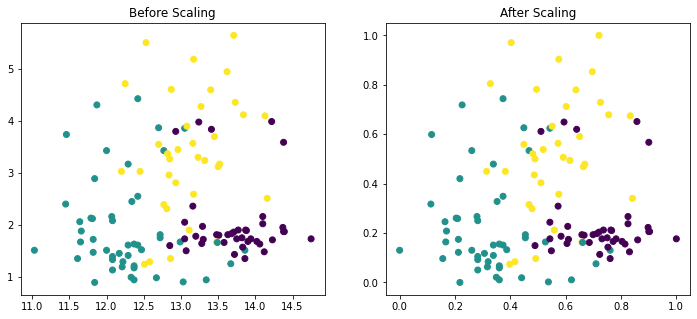

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_trained_scaler['Alcohol'], x_trained_scaler['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

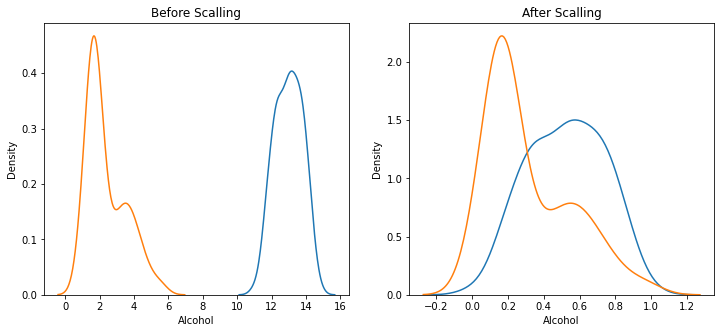

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

#After scalling
ax2.set_title('After Scalling')
sns.kdeplot(x_trained_scaler['Alcohol'],ax=ax2)
sns.kdeplot(x_trained_scaler['Malic acid'],ax=ax2)
plt.show()

# Individual Effects

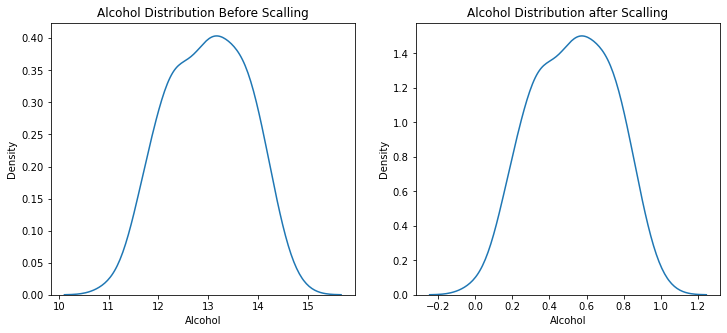

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Alcohol Distribution Before Scalling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)


#After scalling
ax2.set_title('Alcohol Distribution after Scalling')
sns.kdeplot(x_trained_scaler['Alcohol'],ax=ax2)

plt.show()

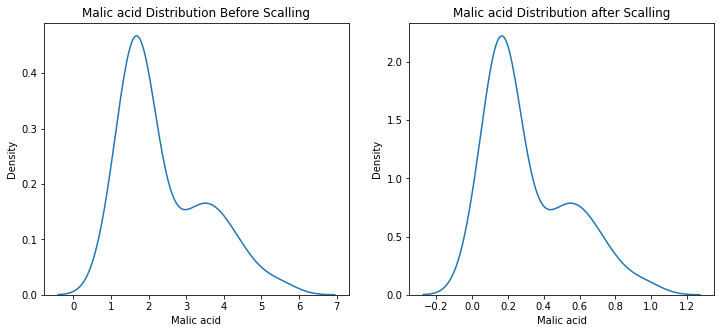

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Malic acid Distribution Before Scalling')
sns.kdeplot(x_train['Malic acid'],ax=ax1)


#After scalling
ax2.set_title('Malic acid Distribution after Scalling')
sns.kdeplot(x_trained_scaler['Malic acid'],ax=ax2)

plt.show()

# Applying Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
Lr=LogisticRegression()
Lr_scaled=LogisticRegression()

In [19]:
Lr.fit(x_train,y_train)
Lr_scaled.fit(x_trained_scaler,y_train)

LogisticRegression()

In [20]:
y_pred=Lr.predict(x_test)
y_pred_scaled=Lr_scaled.predict(x_test_scaler)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print('Actual : ',accuracy_score(y_test,y_pred))
print('Scalled : ',accuracy_score(y_test,y_pred_scaled))

Actual :  0.7592592592592593
Scalled :  0.7962962962962963


### Thank you 
## Author

<a href="https://www.linkedin.com/in/muhammad-zaman-ali-a22946208/" target="_blank">Muhammad Zaman Ali</a>

<hr>

## <h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/" target="_blank">Mt Learners</a> 2022. All rights reserved. <h3/>
